In [45]:
import re
import json
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

# Set iPython to display visualization inline
# %matplotlib inline

RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework. See the Python documentation for more information on installing Python as a framework on Mac OS X. Please either reinstall Python as a framework, or try one of the other backends. If you are Working with Matplotlib in a virtual enviroment see 'Working with Matplotlib in Virtual environments' in the Matplotlib FAQ

In [29]:
tweets_data_path = '../data/Twitter_Zika_FullDataSet.txt'

tweets_data_full = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_full.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data_full)))

print(tweets_data_full[:5])


This document contains 76037 tweets.

[{'possibly_sensitive': False, 'retweet_count': 0, 'in_reply_to_user_id_str': None, 'favorite_count': 0, 'created_at': 'Thu Jun 23 22:14:13 +0000 2016', 'truncated': False, 'place': None, 'in_reply_to_screen_name': None, 'in_reply_to_status_id': None, 'coordinates': None, 'favorited': False, 'geo': None, 'retweeted': False, 'filter_level': 'low', 'id_str': '746104097837723648', 'in_reply_to_status_id_str': None, 'text': 'Factbox: Why the Zika virus is causing alarm - Reuters https://t.co/B0ekkkJ3Rs', 'user': {'location': 'Saint Vincent & the Grenadines', 'profile_text_color': '333333', 'geo_enabled': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1675611856/Saint_Vincent_and_the_Grenadines_normal.png', 'utc_offset': None, 'description': 'Experimental bot .. maintained by @mendicot ..', 'followers_count': 77, 'protected': False, 'created_at': 'Fri Dec 02 04:16:09 +0000 2011', 'profile_use_background_image': True, 'profile_sidebar_f

In [36]:
s = json.dumps(tweets_data_full, indent=2)
print(s[:30])

[
  {
    "possibly_sensitive"


In [37]:
with open('../data/Twitter_Zika_FullData_JSON.json', 'w') as twitterJSONFile:
    twitterJSONFile.write(s)

In [95]:
# Problem tweet - #6524 in twitter_data_zika.txt file
tmpTwt = tweets_data[6524]
print(tmpTwt)

{'limit': {'timestamp_ms': '1466729466024', 'track': 3}}


In [42]:
# Testing if any "geo" tags are found: 
for idx in range(0,len(tweets_data_full)):
    test_tweet = tweets_data_full[idx]
    if 'geo' in test_tweet:
        
        if test_tweet['geo'] is not None:
            print('yes')
            print(idx)
            pass
        else:
            pass
    else:
        print('none found')


<class 'list'>


In [5]:
tmpT = tweets_data_full[0:600]
geo_lats1        = [(T['geo']['coordinates'][0] if T['geo'] is not None else None) for T in tmpT]
print(len(geo_lats1))

600


In [6]:
# If testing the twitter_data_zika.txt file, limit the tweets_data_full range
tweets_data_full = tweets_data_full[0:6000]

In [7]:
print(len(tweets_data_full))

6000


# PROBLEM TWEET - 6524 - IS CAUSING PROBLEMS in above cell

In [38]:
# list comprehension to create a data frame of important information

user_ID         = [(T['user']['id'] if 'user' in T else None) for T in tweets_data_full]
user_userName   = [(T['user']['screen_name'] if 'user' in T else None) for T in tweets_data_full]
user_screenName = [(T['user']['name'] if 'user' in T else None) for T in tweets_data_full]
tweet_location  = [(T['place']['full_name'] if 'full_name' in T else None) for T in tweets_data_full]
tweet_country   = [(T['place']['country_code'] if 'country_code' in T else None) for T in tweets_data_full]
geo_lats        = [(T['geo']['coordinates'][0] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
geo_lons        = [(T['geo']['coordinates'][1] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
tweet_time      = [(T['created_at'] if 'created_at' in T else None) for T in tweets_data_full]
tweet_lang      = [(T['lang'] if 'lang' in T else None) for T in tweets_data_full]
text            = [(T['text'] if 'text' in T else None) for T in tweets_data_full]
in_reply_to_screen_name = [(T['in_reply_to_screen_name'] if 'in_reply_to_screen_name' in T else None) for T in tweets_data_full]


In [39]:
print(len(tweet_location))

76037


In [40]:
# Turning the place name into a geo (lat,lon) location
geolocator = Nominatim()

tweet_loc_lats, tweet_loc_lons = [], []

for idx in range(0,len(tweet_location)):
    placeTmp = tweet_location[idx]
    if placeTmp is not None:
        placeGeo = geolocator.geocode(placeTmp)
        latsTmp  = placeGeo.latitude
        lonsTmp  = placeGeo.longitude
        tweet_loc_lats.append(latsTmp)
        tweet_loc_lons.append(lonsTmp)
    else:
        tweet_loc_lats.append(None)
        tweet_loc_lons.append(None)
        
# Do the above instead of the following three lines: 
#tweet_locGeo    = [(geolocator.geocode(T['place']['full_name']) if 'place in T else None) for T in tweets_data_full]
#tweet_loc_lats  = [(tweet_locGeo.latitude if 'place' in T else None) for T in tweets_data_full]
#tweet_loc_lons  = [(tweet_locGeo.longitude if 'place' in T else None) for T in tweets_data_full]

In [41]:
print(len(tweet_loc_lats))

76037


In [42]:
# Put all the lists into a Data Frame: 

tweets_full_dataframe = pd.DataFrame({'userID':user_ID, 'userName':user_userName, 'userScreenName':user_screenName,
                                      'tweet_location':tweet_location,'user_lats':tweet_loc_lats,'user_lons':tweet_loc_lons,
                                      'tweet_country':tweet_country, 'geo_lats':geo_lats, 'geo_lons':geo_lons,
                                      'tweet_time':tweet_time, 'tweet_lang':tweet_lang, 'text':text,
                                      'reply_to_ScreenName':in_reply_to_screen_name})


In [43]:
tweets_full_dataframe.tail(5)

,geo_lats,geo_lons,reply_to_ScreenName,text,tweet_country,tweet_lang,tweet_location,tweet_time,userID,userName,userScreenName,user_lats,user_lons
76032,NaN,NaN,None,Researchers will conduct Zika #study on U.S. O...,None,en,None,Thu Jul 07 13:40:15 +0000 2016,6.908175e+07,BaruchProForum,BaruchProForum,None,None
76033,NaN,NaN,None,RT @PublicHealth: Two experimental Zika vaccin...,None,en,None,Thu Jul 07 13:40:18 +0000 2016,7.468381e+17,AnnaNeal25,Anna Neal,None,None
76034,NaN,NaN,None,UPenn researchers develop $2 Zika virus test w...,None,en,None,Thu Jul 07 13:40:19 +0000 2016,3.936979e+08,Build3dprinter,B3dge,None,None
76035,NaN,NaN,None,Puerto Rico urged to use aerial spraying to co...,None,en,None,Thu Jul 07 13:40:19 +0000 2016,2.983548e+09,williamenafox,williamenafox,None,None
76036,NaN,NaN,None,"#CSSContigo Dra. Gladys Guerrero de la CSS, br...",None,es,None,Thu Jul 07 13:40:22 +0000 2016,2.530538e+08,CSSPanama,CSS Panamá,None,None


In [44]:
# Finding unique values

uniqueID       = tweets_full_dataframe.userID.unique()
uniqueLocation = tweets_full_dataframe.tweet_location.unique()
uniqueLanguage = tweets_full_dataframe.tweet_lang.unique()

print("There are %d tweets in this dataframe, but only %d unique users." %(len(tweets_full_dataframe), len(uniqueID)))
print("Of the %d unique users, there are %d different languages represented." %(len(uniqueID), len(uniqueLanguage)))
print("Of the %d unique users, %d listed a self-reported location." %(len(uniqueID), len(uniqueLocation)))

There are 76037 tweets in this dataframe, but only 51061 unique users.
Of the 51061 unique users, there are 43 different languages represented.
Of the 51061 unique users, 1 listed a self-reported location.


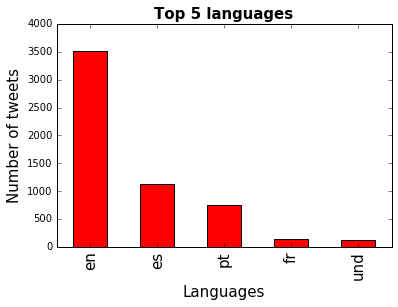

In [14]:
# Plotting the top 5 languages

tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

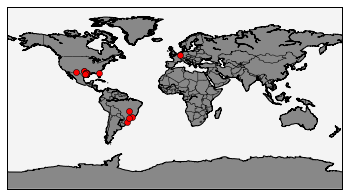

In [15]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['geo_lons'].values, tweets_full_dataframe['geo_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()